In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
captions_df.dropna(inplace=True)

In [ ]:
#Extract image_number from "image_28.jpg" → 28
captions_df['image_name'] = ((captions_df['image_name'].astype(str)).str.split('.').str[0]).astype(int)
captions_df.head()

,image_name,caption
0,1542,khla and khla at the launch party for their ne...
1,2179,the girls are dancing in the street
2,1083,a man in a red shirt is standing on a stage
3,370,a man in a white suit and hat standing on a re...
4,2572,a woman in a black shirt and red pants is sitt...


In [ ]:
# Merge the two datasets based on the 'ID' and 'image_number' columns
merged_df = pd.merge(filtered_dataset_df, captions_df, left_on='ID', right_on='image_name', how='left')

# Optionally, display the first few rows to check the result
print(merged_df.head())

# Save the final DataFrame to a new CSV
merged_df.to_csv('/content/merged_dataset.csv', index=False)

print("Processed data saved to 'merged_dataset.csv'.")
merged_df.drop(columns=['image_name'], inplace=True)

   ID                                                url  \
0   1  http://www.eonline.com/news/901683/janet-jacks...   
1   2  http://www.yourtango.com/2018311123/7-cringey-...   
2   3  http://pagesix.com/2018/07/05/vanessa-kirby-sh...   
3   4  http://www.inquisitr.com/4780146/miranda-lambe...   
4   5  http://toofab.com/2017/11/19/selena-gomez-debu...   

                                                text  \
0  janet jackson and jermaine dupri are hooking u...   
1  katy perry and orlando bloom are a celeb coupl...   
2  two years into a relationship with her boyfrie...   
3  it s been more than two years since miranda la...   
4  getty selena gomez showed up to the american m...   

                                              images  \
0  https://akns-images.eonline.com/eol_images/Ent...   
1  http://www.yourtango.com/sites/default/files/2...   
2  https://pagesix.com/wp-content/uploads/sites/3...   
3  https://www.inquisitr.com/wp-content/uploads/2...   
4  https://images.toof

In [ ]:
merged_df

,ID,url,text,images,top_img,authors,label,word_count,domain,tokens,caption
0,1,http://www.eonline.com/news/901683/janet-jacks...,janet jackson and jermaine dupri are hooking u...,https://akns-images.eonline.com/eol_images/Ent...,https://akns-images.eonline.com/eol_images/Ent...,Unknown,0,119,No Domain,"['janet', 'jackson', 'and', 'jermaine', 'dupri...",a man and woman posing for a picture
1,2,http://www.yourtango.com/2018311123/7-cringey-...,katy perry and orlando bloom are a celeb coupl...,http://www.yourtango.com/sites/default/files/2...,https://www.yourtango.com/sites/default/files/...,Unknown,0,1205,No Domain,"['katy', 'perry', 'and', 'orlando', 'bloom', '...",a woman in a white dress is standing in front ...
2,3,http://pagesix.com/2018/07/05/vanessa-kirby-sh...,two years into a relationship with her boyfrie...,https://pagesix.com/wp-content/uploads/sites/3...,https://pagesix.com/wp-content/uploads/sites/3...,Unknown,0,230,No Domain,"['two', 'years', 'into', 'a', 'relationship', ...",a man and woman standing next to each other pe...
3,4,http://www.inquisitr.com/4780146/miranda-lambe...,it s been more than two years since miranda la...,https://www.inquisitr.com/wp-content/uploads/2...,https://www.inquisitr.com/wp-content/uploads/2...,News Writer,0,380,No Domain,"['it', 's', 'been', 'more', 'than', 'two', 'ye...",a logo for a company that sells and sells prod...
4,5,http://toofab.com/2017/11/19/selena-gomez-debu...,getty selena gomez showed up to the american m...,https://images.toofab.com/image/ae/5by6/2025/0...,https://images.toofab.com/image/22/16by9/2017/...,Toofab Staff,0,396,No Domain,"['getty', 'selena', 'gomez', 'showed', 'up', '...",miled - miled - miled - miled - miled - miled ...
...,...,...,...,...,...,...,...,...,...,...,...
5551,6126,https://people.com/royals/william-kate-and-har...,prince william princess kate and prince harry ...,https://people.com/thmb/h7nA0-7TjB676GHo-yTpoR...,https://people.com/thmb/w0pYtGjLnRq-Z1lZG2t_g2...,"Simon Perry, Simon Perry Is A Writer, Correspo...",1,475,No Domain,"['prince', 'william', 'princess', 'kate', 'and...",a group of people walking down a street with u...
5552,6127,https://people.com/tv/scott-disick-hated-kourt...,kourtney kardashian is a single woman and her ...,https://people.com/thmb/xPVP1g_maH_NjebGVYvT1v...,https://people.com/thmb/qKM3kkidsJ3N4NtLqFpJau...,"Melody Chiu, People Editorial Guidelines",1,500,No Domain,"['kourtney', 'kardashian', 'is', 'a', 'single'...",a group of people standing next to each other ...
5553,6128,https://washington.cbslocal.com/2014/06/23/wwe...,finding common ground cbs reports los angeles ...,https://assets2.cbsnewsstatic.com/hub/i/r/2025...,https://assets1.cbsnewsstatic.com/hub/i/2022/0...,Unknown,1,92,No Domain,"['finding', 'common', 'ground', 'cbs', 'report...",cbs news logo
5554,6129,https://scroll.in/video/868015/watch-will-smit...,this video is testimony to the sense of humour...,https://sc0.blr1.cdn.digitaloceanspaces.com/th...,https://sc0.blr1.digitaloceanspaces.com/facebo...,Scroll Staff,1,231,No Domain,"['this', 'video', 'is', 'testimony', 'to', 'th...",a man driving a car while talking on a cell


In [4]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('/content/drive/MyDrive/ANN/merged_dataset.csv')
df.head()

,ID,url,text,images,top_img,authors,label,word_count,domain,tokens,image_name,caption
0,1,http://www.eonline.com/news/901683/janet-jacks...,janet jackson and jermaine dupri are hooking u...,https://akns-images.eonline.com/eol_images/Ent...,https://akns-images.eonline.com/eol_images/Ent...,Unknown,0,119,No Domain,"['janet', 'jackson', 'and', 'jermaine', 'dupri...",1,a man and woman posing for a picture
1,2,http://www.yourtango.com/2018311123/7-cringey-...,katy perry and orlando bloom are a celeb coupl...,http://www.yourtango.com/sites/default/files/2...,https://www.yourtango.com/sites/default/files/...,Unknown,0,1205,No Domain,"['katy', 'perry', 'and', 'orlando', 'bloom', '...",2,a woman in a white dress is standing in front ...
2,3,http://pagesix.com/2018/07/05/vanessa-kirby-sh...,two years into a relationship with her boyfrie...,https://pagesix.com/wp-content/uploads/sites/3...,https://pagesix.com/wp-content/uploads/sites/3...,Unknown,0,230,No Domain,"['two', 'years', 'into', 'a', 'relationship', ...",3,a man and woman standing next to each other pe...
3,4,http://www.inquisitr.com/4780146/miranda-lambe...,it s been more than two years since miranda la...,https://www.inquisitr.com/wp-content/uploads/2...,https://www.inquisitr.com/wp-content/uploads/2...,News Writer,0,380,No Domain,"['it', 's', 'been', 'more', 'than', 'two', 'ye...",4,a logo for a company that sells and sells prod...
4,5,http://toofab.com/2017/11/19/selena-gomez-debu...,getty selena gomez showed up to the american m...,https://images.toofab.com/image/ae/5by6/2025/0...,https://images.toofab.com/image/22/16by9/2017/...,Toofab Staff,0,396,No Domain,"['getty', 'selena', 'gomez', 'showed', 'up', '...",5,miled - miled - miled - miled - miled - miled ...


In [6]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        print(f"Accessing index: {item}")  # Debugging line
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        # Tokenize text and caption
        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        # Get BERT embeddings for text and caption
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output

        # Early fusion (concatenation)
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)
def evaluate(model, data_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    losses = []

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss


# ========== MAIN FUNCTION ==========
def main(csv_path):
    # Load dataset
    df = pd.read_csv(csv_path)

    # Reset index to avoid indexing issues
    df = df.reset_index(drop=True)

    # Check for missing data in critical columns
    print(df[['text', 'caption', 'label']].isnull().sum())

    # Drop rows with missing data in important columns
    df = df.dropna(subset=['text', 'caption', 'label'])

    # Split dataset
    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    # Reset the indices after splitting
    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    # Create datasets
    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    # Initialize model, optimizer, and loss function
    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    loss_fn = nn.BCEWithLogitsLoss()

    # Training loop
    for epoch in range(20):
        acc, loss = train_epoch(model, train_loader, loss_fn, optimizer)
        print(f"Epoch {epoch+1}: Train Accuracy = {acc:.4f}, Loss = {loss:.4f}")



    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
    val_acc, val_loss = evaluate(model, val_loader)

    print(f"Epoch {epoch+1}: Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
    print(f"Epoch {epoch+1}: Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")


if __name__ == "__main__":
    # Path to your CSV dataset

    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
Accessing index: 3787
Accessing index: 3997
Accessing index: 2263
Accessing index: 3480
Accessing index: 2128
Accessing index: 135
Accessing index: 4230
Accessing index: 3304
Accessing index: 2043
Accessing index: 2918
Accessing index: 4058
Accessing index: 2833
Accessing index: 2072
Accessing index: 3268
Accessing index: 81
Accessing index: 4410
Accessing index: 4366
Accessing index: 4221
Accessing index: 273
Accessing index: 3167
Accessing index: 2731
Accessing index: 2098
Accessing index: 1761
Accessing index: 1199
Accessing index: 2023
Accessing index: 2875
Accessing index: 1053
Accessing index: 1743
Accessing index: 4231
Accessing index: 606
Accessing index: 1022
Accessing index: 2837
Accessing index: 4045
Accessing index: 1054
Accessing index: 1329
Accessing index: 4118
Accessing index: 4026
Accessing index: 1457
Accessing index: 1659
Accessing index: 512
Accessing index: 3549
Accessing index: 80
Accessing index: 1931
Accessing i

NameError: name 'loss_fn' is not defined

text       0
caption    0
label      0
dtype: int64


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/2
Train Accuracy = 0.6841, Train Loss = 0.5842
Val Accuracy = 0.7401, Val Loss = 0.5168
Epoch 2/2
Train Accuracy = 0.8105, Train Loss = 0.4258
Val Accuracy = 0.7617, Val Loss = 0.4835


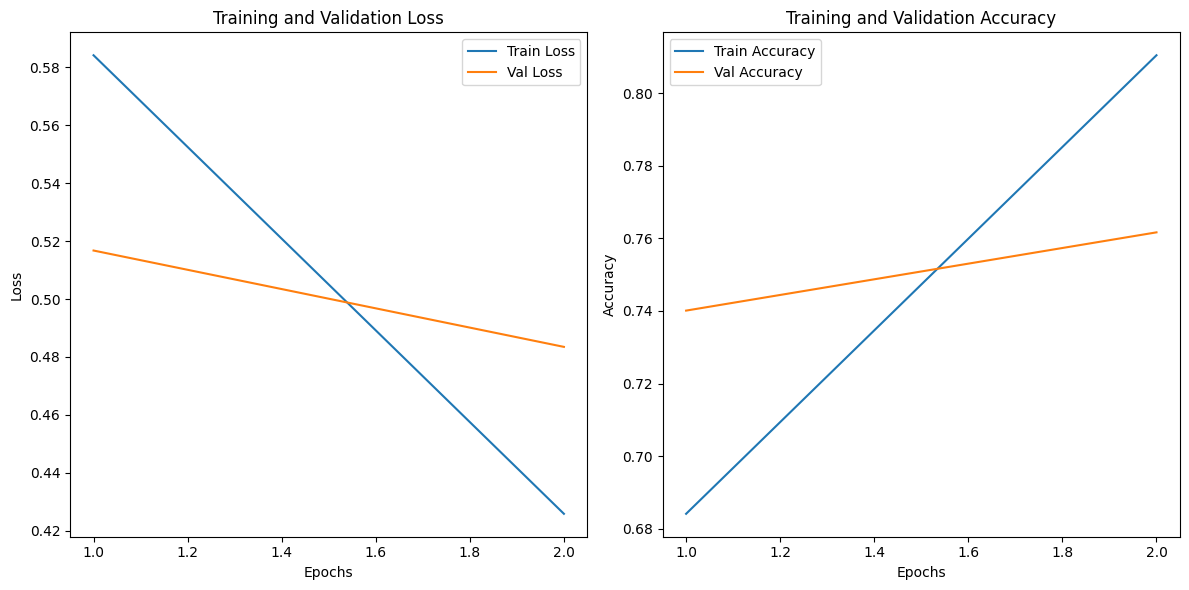

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        # Tokenize text and caption
        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        # Get BERT embeddings for text and caption
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output

        # Early fusion (concatenation)
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()  # Set model to evaluation mode
    correct = 0
    losses = []

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss


# ========== MAIN FUNCTION ==========
def main(csv_path):
    # Load dataset
    df = pd.read_csv(csv_path)

    # Reset index to avoid indexing issues
    df = df.reset_index(drop=True)

    # Check for missing data in critical columns
    print(df[['text', 'caption', 'label']].isnull().sum())

    # Drop rows with missing data in important columns
    df = df.dropna(subset=['text', 'caption', 'label'])

    # Split dataset
    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    # Reset the indices after splitting
    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    # Create datasets
    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    # Initialize model, optimizer, and loss function
    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    loss_fn = nn.BCEWithLogitsLoss()

    # Store loss and accuracy for visualization
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop
    for epoch in range(2):
        print(f"Epoch {epoch + 1}/{2}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

    # Visualization of loss and accuracy
    epochs_range = range(1, 3)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main("/content/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64
Epoch 1/2
Train Accuracy = 0.6829, Train Loss = 0.5877
Val Accuracy = 0.7572, Val Loss = 0.5101
Epoch 2/2
Train Accuracy = 0.7955, Train Loss = 0.4472
Val Accuracy = 0.7671, Val Loss = 0.4934


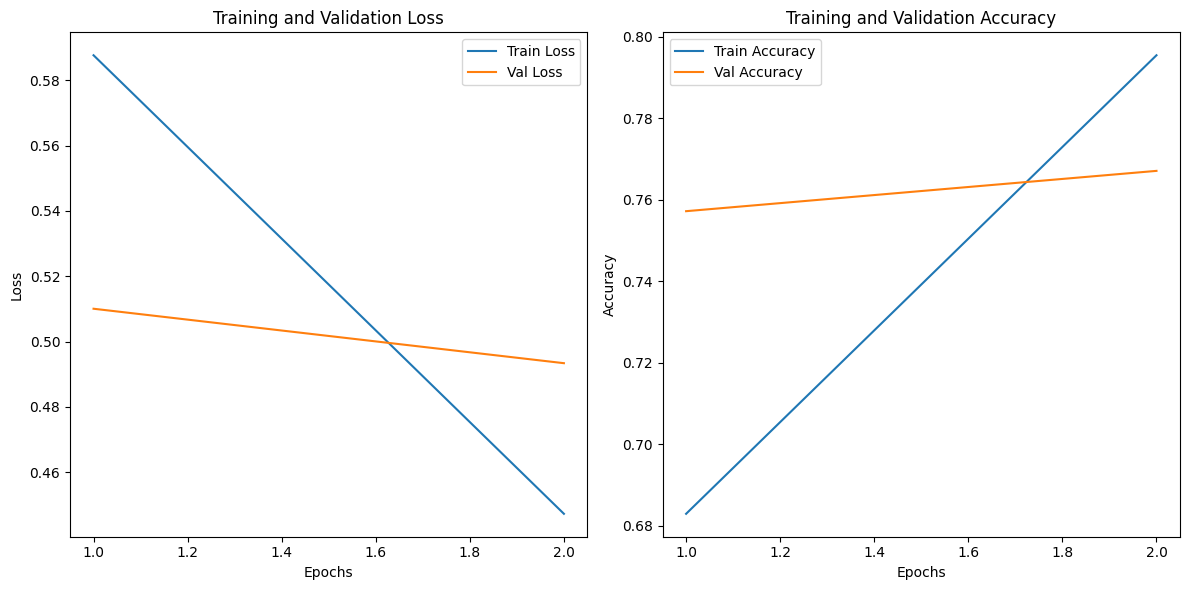

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        # Tokenize text and caption
        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        # Get BERT embeddings for text and caption
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output

        # Early fusion (concatenation)
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()  # Set model to evaluation mode
    correct = 0
    losses = []

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss

# ========== MAIN FUNCTION ==========
def main(csv_path):
    # Load dataset
    df = pd.read_csv(csv_path)

    # Reset index to avoid indexing issues
    df = df.reset_index(drop=True)

    # Check for missing data in critical columns
    print(df[['text', 'caption', 'label']].isnull().sum())

    # Drop rows with missing data in important columns
    df = df.dropna(subset=['text', 'caption', 'label'])

    # Split dataset
    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    # Reset the indices after splitting
    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    # Create datasets
    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    # Initialize model, optimizer, and loss function
    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    loss_fn = nn.BCEWithLogitsLoss()

    # Store loss and accuracy for visualization
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop
    for epoch in range(2):
        print(f"Epoch {epoch + 1}/{2}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        # Append values for plotting
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

    # Visualization of loss and accuracy
    epochs_range = range(1, 3)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main("/content/merged_dataset.csv")


In [8]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        # Tokenize text and caption
        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        # Get BERT embeddings for text and caption
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output

        # Early fusion (concatenation)
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()  # Set model to evaluation mode
    correct = 0
    losses = []

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss


# ========== MAIN FUNCTION ==========
def main(csv_path):
    # Load dataset
    df = pd.read_csv(csv_path)

    # Reset index to avoid indexing issues
    df = df.reset_index(drop=True)

    # Check for missing data in critical columns
    print(df[['text', 'caption', 'label']].isnull().sum())

    # Drop rows with missing data in important columns
    df = df.dropna(subset=['text', 'caption', 'label'])

    # Split dataset
    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    # Reset the indices after splitting
    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    # Create datasets
    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    # Initialize model, optimizer, and loss function
    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    loss_fn = nn.BCEWithLogitsLoss()

    # Store loss and accuracy for visualization
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop
    for epoch in range(20):
        print(f"Epoch {epoch + 1}/{20}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

    # Visualization of loss and accuracy
    epochs_range = range(1, 3)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64
Epoch 1/20
Train Accuracy = 0.6998, Train Loss = 0.5748
Val Accuracy = 0.7068, Val Loss = 0.5751
Epoch 2/20
Train Accuracy = 0.8013, Train Loss = 0.4415
Val Accuracy = 0.7311, Val Loss = 0.5281
Epoch 3/20
Train Accuracy = 0.8722, Train Loss = 0.3052
Val Accuracy = 0.7500, Val Loss = 0.5665
Epoch 4/20
Train Accuracy = 0.9293, Train Loss = 0.1903
Val Accuracy = 0.7536, Val Loss = 0.6600
Epoch 5/20
Train Accuracy = 0.9606, Train Loss = 0.1146
Val Accuracy = 0.7509, Val Loss = 0.7454
Epoch 6/20
Train Accuracy = 0.9705, Train Loss = 0.0829
Val Accuracy = 0.7527, Val Loss = 0.8619
Epoch 7/20
Train Accuracy = 0.9779, Train Loss = 0.0593
Val Accuracy = 0.7284, Val Loss = 1.0423
Epoch 8/20


KeyboardInterrupt: 

text       0
caption    0
label      0
dtype: int64
Epoch 1/20
Train Accuracy = 0.6769, Train Loss = 0.5980
Val Accuracy = 0.7554, Val Loss = 0.5105
Epoch 2/20
Train Accuracy = 0.7853, Train Loss = 0.4687
Val Accuracy = 0.7419, Val Loss = 0.5031
Epoch 3/20
Train Accuracy = 0.8562, Train Loss = 0.3461
Val Accuracy = 0.7383, Val Loss = 0.5217
EarlyStopping counter: 1 out of 3
Epoch 4/20
Train Accuracy = 0.9062, Train Loss = 0.2436
Val Accuracy = 0.7437, Val Loss = 0.6195
EarlyStopping counter: 2 out of 3
Epoch 5/20
Train Accuracy = 0.9500, Train Loss = 0.1401
Val Accuracy = 0.7536, Val Loss = 0.7183
EarlyStopping counter: 3 out of 3
Early stopping triggered. Stopping training.


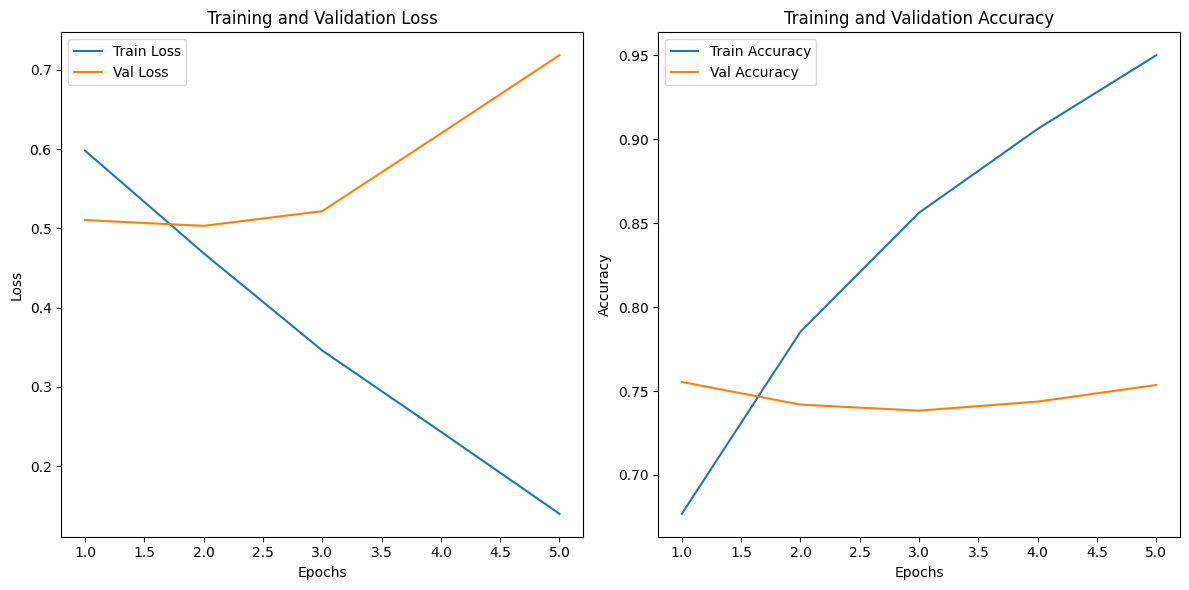

In [9]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3  # عدد epochs للانتظار قبل التوقف المبكر

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        # Tokenize text and caption
        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.5)  # رفع نسبة الدروبوت لـ 0.4
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()
    correct = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss

# ========== EARLY STOPPING ==========
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ========== MAIN FUNCTION ==========
def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    print(df[['text', 'caption', 'label']].isnull().sum())
    df = df.dropna(subset=['text', 'caption', 'label'])

    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)  # وزن الانكماش
    loss_fn = nn.BCEWithLogitsLoss()

    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

    # رسم الخسارة والدقة
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64
Epoch 1/20
Train Accuracy = 0.6681, Train Loss = 0.5965
Val Accuracy = 0.7212, Val Loss = 0.5459
Epoch 2/20
Train Accuracy = 0.8022, Train Loss = 0.4520
Val Accuracy = 0.7572, Val Loss = 0.4963
Epoch 3/20
Train Accuracy = 0.8684, Train Loss = 0.3203
Val Accuracy = 0.7473, Val Loss = 0.5860
EarlyStopping counter: 1 out of 3
Epoch 4/20
Train Accuracy = 0.9185, Train Loss = 0.2084
Val Accuracy = 0.7473, Val Loss = 0.6726
EarlyStopping counter: 2 out of 3
Epoch 5/20
Train Accuracy = 0.9527, Train Loss = 0.1348
Val Accuracy = 0.7455, Val Loss = 0.7640
EarlyStopping counter: 3 out of 3
Early stopping triggered. Stopping training.


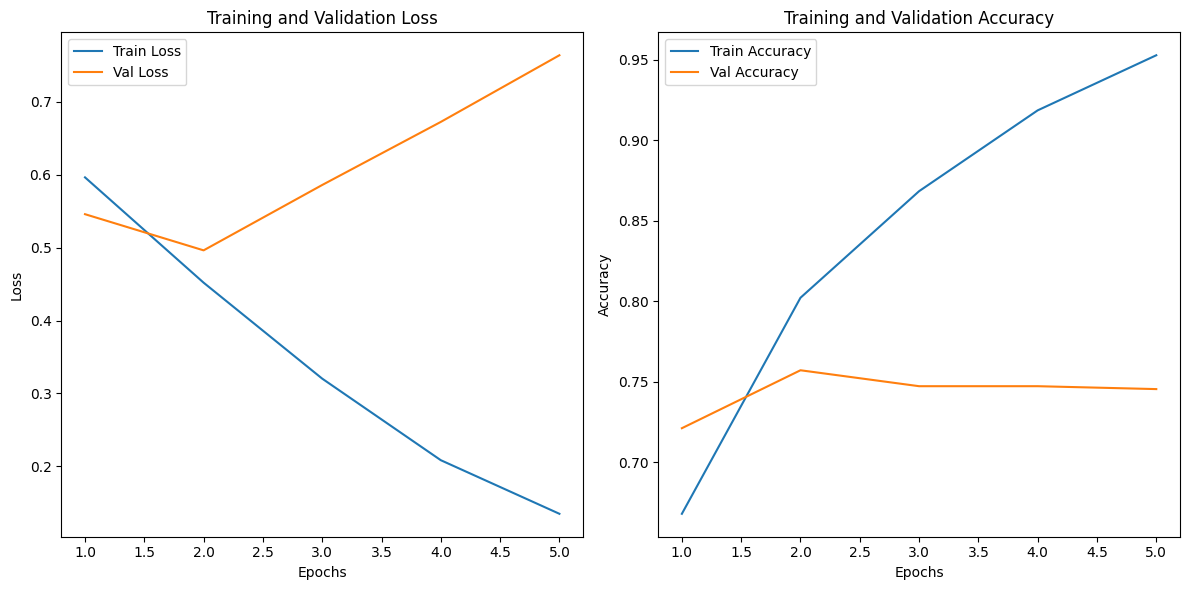

In [10]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3  # عدد epochs للانتظار قبل التوقف المبكر

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        # Tokenize text and caption
        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.5)  # رفع نسبة الدروبوت لـ 0.4
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()
    correct = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss

# ========== EARLY STOPPING ==========
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ========== MAIN FUNCTION ==========
def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    print(df[['text', 'caption', 'label']].isnull().sum())
    df = df.dropna(subset=['text', 'caption', 'label'])

    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)  # وزن الانكماش
    loss_fn = nn.BCEWithLogitsLoss()

    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

    # رسم الخسارة والدقة
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64
Epoch 1/20
Train Accuracy = 0.6226, Train Loss = 0.6430
Val Accuracy = 0.7221, Val Loss = 0.5527
Epoch 2/20
Train Accuracy = 0.7574, Train Loss = 0.5077
Val Accuracy = 0.7491, Val Loss = 0.5041
Epoch 3/20
Train Accuracy = 0.8229, Train Loss = 0.4109
Val Accuracy = 0.7518, Val Loss = 0.5160
EarlyStopping counter: 1 out of 3
Epoch 4/20
Train Accuracy = 0.8798, Train Loss = 0.3059
Val Accuracy = 0.7509, Val Loss = 0.6086
EarlyStopping counter: 2 out of 3
Epoch 5/20
Train Accuracy = 0.9163, Train Loss = 0.2303
Val Accuracy = 0.7617, Val Loss = 0.6116
EarlyStopping counter: 3 out of 3
Early stopping triggered. Stopping training.


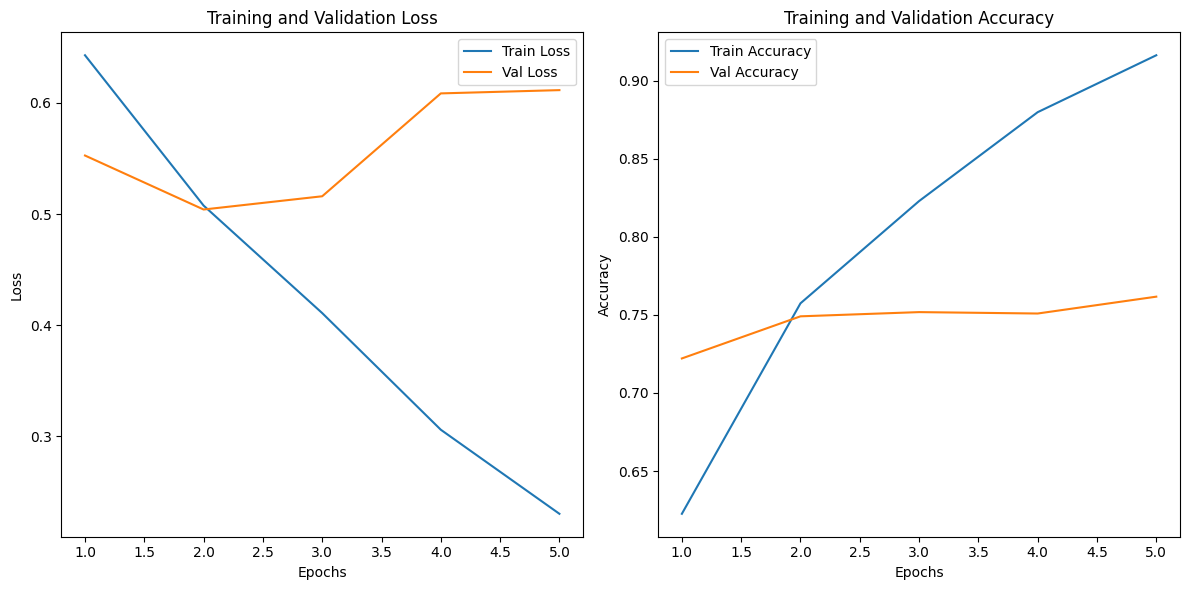

In [11]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3  # عدد epochs للانتظار قبل التوقف المبكر

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        # Tokenize text and caption
        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.6)  # رفع نسبة الدروبوت لـ 0.4
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()
    correct = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss

# ========== EARLY STOPPING ==========
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ========== MAIN FUNCTION ==========
def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    print(df[['text', 'caption', 'label']].isnull().sum())
    df = df.dropna(subset=['text', 'caption', 'label'])

    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=5e-3)
    loss_fn = nn.BCEWithLogitsLoss()

    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

    # رسم الخسارة والدقة
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


In [ ]:
self.dropout = nn.Dropout(0.6)  # ممكن تجرب 0.6 مثلاً
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=5e-3)


Length of dataframe: 5556
Length of embeddings: 5556
Train texts length: 4444, Train glove embeddings length: 4444
Validation texts length: 1112, Validation glove embeddings length: 1112

Epoch 1/20
Train Acc: 0.5538, Train Loss: 0.6795
Val   Acc: 0.6862, Val   Loss: 0.6029

Epoch 2/20
Train Acc: 0.7097, Train Loss: 0.5628
Val   Acc: 0.7302, Val   Loss: 0.5288

Epoch 3/20
Train Acc: 0.7671, Train Loss: 0.4820
Val   Acc: 0.7464, Val   Loss: 0.5177

Epoch 4/20
Train Acc: 0.8114, Train Loss: 0.4090
Val   Acc: 0.7527, Val   Loss: 0.5167

Epoch 5/20
Train Acc: 0.8632, Train Loss: 0.3329
Val   Acc: 0.7464, Val   Loss: 0.5504
EarlyStopping counter: 1 out of 3

Epoch 6/20
Train Acc: 0.9001, Train Loss: 0.2504
Val   Acc: 0.7500, Val   Loss: 0.6123
EarlyStopping counter: 2 out of 3

Epoch 7/20
Train Acc: 0.9307, Train Loss: 0.1842
Val   Acc: 0.7410, Val   Loss: 0.7167
EarlyStopping counter: 3 out of 3
⛔ Early stopping triggered.


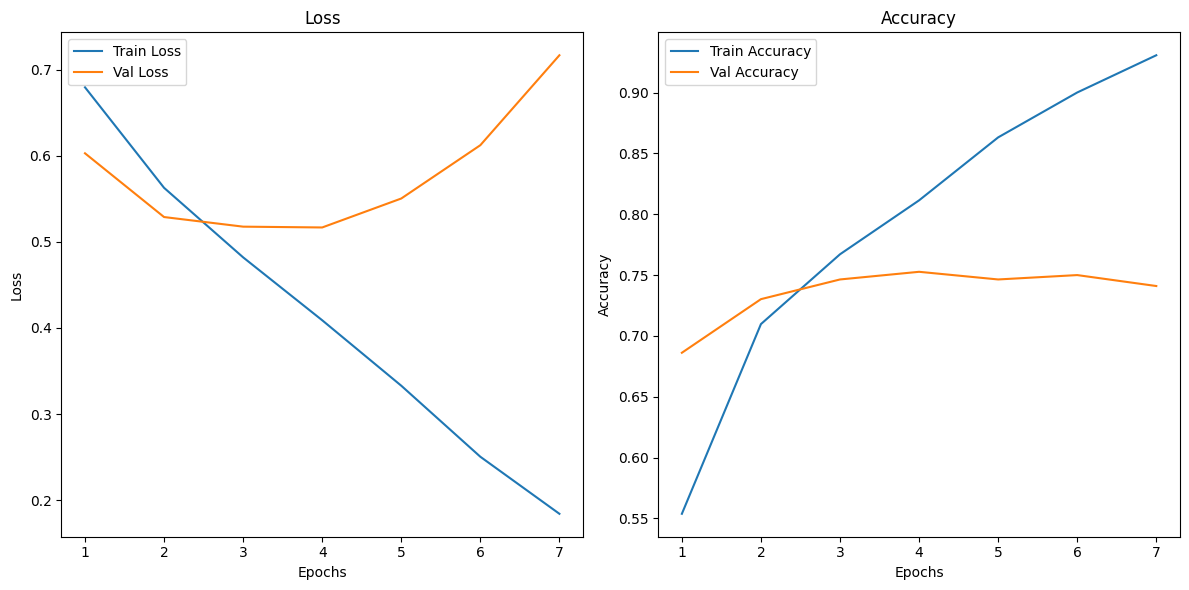

In [14]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ==================== CONFIG ====================
MAX_LEN = 100  # تقليل طول التسلسل
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3

# ==================== LOAD GLOVE EMBEDDINGS ====================
captions_glove = np.load('/content/drive/MyDrive/ANN/captions_embeddings.npy')

# ==================== DATASET ====================
class NewsDatasetWithGlove(Dataset):
    def __init__(self, texts, caption_embeddings, labels, tokenizer, max_len):
        self.texts = texts
        self.caption_embeddings = caption_embeddings
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        caption_embed = self.caption_embeddings[idx]

        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_embed': torch.tensor(caption_embed, dtype=torch.float),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ==================== MODEL ====================
class EarlyFusionClassifierGlove(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifierGlove, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.5)  # زيادة نسبة الدروبوت
        self.fc = nn.Linear(self.bert.config.hidden_size + 300, 1)

    def forward(self, text_ids, text_mask, caption_embed):
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        fused = torch.cat((text_output, caption_embed), dim=1)
        fused = self.dropout(fused)
        return self.fc(fused)

# ==================== EARLY STOPPING ====================
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ==================== TRAINING FUNCTIONS ====================
def train_epoch_glove(model, data_loader, loss_fn, optimizer):
    model.train()
    total_loss, correct = 0, 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_embed = batch['caption_embed'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_embed).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), total_loss / len(data_loader)

def evaluate_glove(model, data_loader, loss_fn):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_embed = batch['caption_embed'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_embed).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()
            total_loss += loss.item()

    return correct / len(data_loader.dataset), total_loss / len(data_loader)

# ==================== MAIN FUNCTION ====================
def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    df = df.dropna(subset=['text', 'caption', 'label'])

    glove_embeddings = np.load('/content/drive/MyDrive/ANN/captions_embeddings.npy')

    print(f"Length of dataframe: {len(df)}")
    print(f"Length of embeddings: {glove_embeddings.shape[0]}")
    assert len(df) == glove_embeddings.shape[0], "Mismatch between DataFrame rows and embeddings length!"

    train_texts, val_texts, train_glove, val_glove, train_labels, val_labels = train_test_split(
        df['text'], glove_embeddings, df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    print(f"Train texts length: {len(train_texts)}, Train glove embeddings length: {train_glove.shape[0]}")
    print(f"Validation texts length: {len(val_texts)}, Validation glove embeddings length: {val_glove.shape[0]}")

    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    train_dataset = NewsDatasetWithGlove(train_texts, train_glove, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDatasetWithGlove(val_texts, val_glove, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifierGlove(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-6, weight_decay=1e-2)  # تقليل lr وزيادة weight_decay
    loss_fn = nn.BCEWithLogitsLoss()
    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch_glove(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate_glove(model, val_loader, loss_fn)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
        print(f"Val   Acc: {val_acc:.4f}, Val   Loss: {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("⛔ Early stopping triggered.")
            break

    # رسم النتائج
    epochs_range = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


Length of dataframe: 5556
Length of embeddings: 5556
Train texts length: 4444, Train glove embeddings length: 4444
Validation texts length: 1112, Validation glove embeddings length: 1112

Epoch 1/20
Train Acc: 0.5644, Train Loss: 0.6834
Val   Acc: 0.6817, Val   Loss: 0.6263

Epoch 2/20
Train Acc: 0.7048, Train Loss: 0.5874
Val   Acc: 0.7104, Val   Loss: 0.5523

Epoch 3/20
Train Acc: 0.7554, Train Loss: 0.5129
Val   Acc: 0.7500, Val   Loss: 0.5109

Epoch 4/20
Train Acc: 0.8018, Train Loss: 0.4445
Val   Acc: 0.7509, Val   Loss: 0.5219
EarlyStopping counter: 1 out of 3

Epoch 5/20
Train Acc: 0.8432, Train Loss: 0.3733
Val   Acc: 0.7491, Val   Loss: 0.5443
EarlyStopping counter: 2 out of 3

Epoch 6/20
Train Acc: 0.8789, Train Loss: 0.3110
Val   Acc: 0.7446, Val   Loss: 0.5749
EarlyStopping counter: 3 out of 3
⛔ Early stopping triggered.


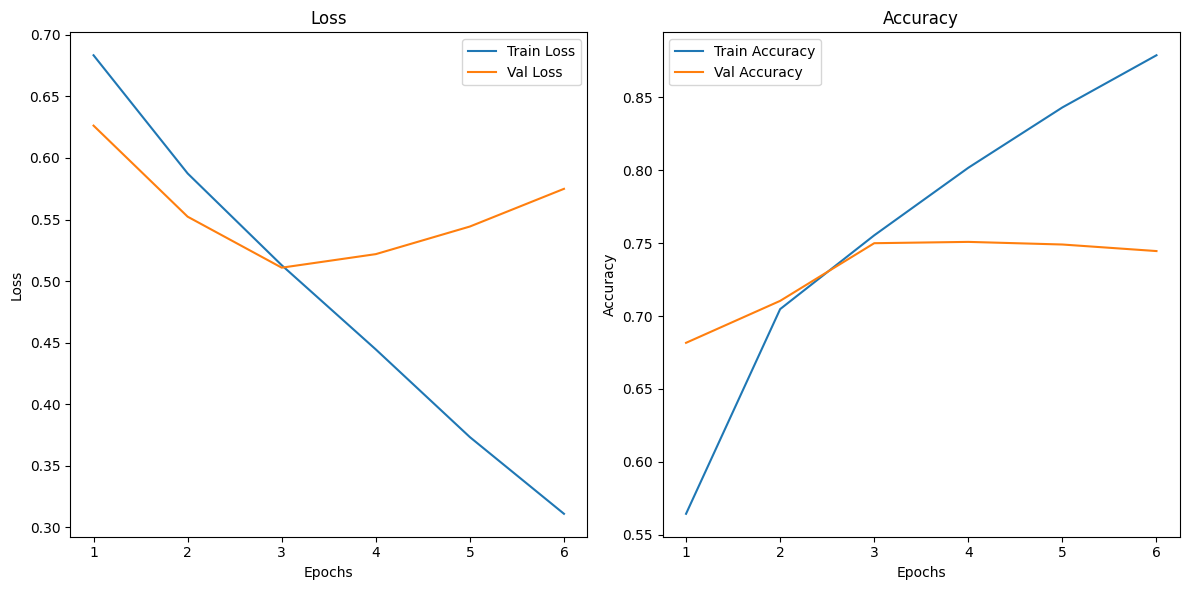

In [15]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ==================== CONFIG ====================
MAX_LEN = 100  # تقليل طول التسلسل
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3

# ==================== LOAD GLOVE EMBEDDINGS ====================
captions_glove = np.load('/content/drive/MyDrive/ANN/captions_embeddings.npy')

# ==================== DATASET ====================
class NewsDatasetWithGlove(Dataset):
    def __init__(self, texts, caption_embeddings, labels, tokenizer, max_len):
        self.texts = texts
        self.caption_embeddings = caption_embeddings
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        caption_embed = self.caption_embeddings[idx]

        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_embed': torch.tensor(caption_embed, dtype=torch.float),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ==================== MODEL ====================
class EarlyFusionClassifierGlove(nn.Module):
    def __init__(self, bert_model, freeze_bert=False):
        super(EarlyFusionClassifierGlove, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)

        # Fine-tuning control
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

        self.dropout = nn.Dropout(0.5)  # زيادة نسبة الدروبوت
        self.fc = nn.Linear(self.bert.config.hidden_size + 300, 1)  # 300 = حجم GloVe embeddings

    def forward(self, text_ids, text_mask, caption_embed):
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        fused = torch.cat((text_output, caption_embed), dim=1)
        fused = self.dropout(fused)
        return self.fc(fused)

# ==================== EARLY STOPPING ====================
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ==================== TRAINING FUNCTIONS ====================
def train_epoch_glove(model, data_loader, loss_fn, optimizer):
    model.train()
    total_loss, correct = 0, 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_embed = batch['caption_embed'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_embed).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), total_loss / len(data_loader)

def evaluate_glove(model, data_loader, loss_fn):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_embed = batch['caption_embed'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_embed).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()
            total_loss += loss.item()

    return correct / len(data_loader.dataset), total_loss / len(data_loader)

# ==================== MAIN FUNCTION ====================
def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    df = df.dropna(subset=['text', 'caption', 'label'])

    glove_embeddings = np.load('/content/drive/MyDrive/ANN/captions_embeddings.npy')

    print(f"Length of dataframe: {len(df)}")
    print(f"Length of embeddings: {glove_embeddings.shape[0]}")
    assert len(df) == glove_embeddings.shape[0], "Mismatch between DataFrame rows and embeddings length!"

    train_texts, val_texts, train_glove, val_glove, train_labels, val_labels = train_test_split(
        df['text'], glove_embeddings, df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    print(f"Train texts length: {len(train_texts)}, Train glove embeddings length: {train_glove.shape[0]}")
    print(f"Validation texts length: {len(val_texts)}, Validation glove embeddings length: {val_glove.shape[0]}")

    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    train_dataset = NewsDatasetWithGlove(train_texts, train_glove, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDatasetWithGlove(val_texts, val_glove, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifierGlove(BERT_MODEL, freeze_bert=False).to(DEVICE)  # fine-tuning مفعّل
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-6, weight_decay=1e-2)
    loss_fn = nn.BCEWithLogitsLoss()
    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch_glove(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate_glove(model, val_loader, loss_fn)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
        print(f"Val   Acc: {val_acc:.4f}, Val   Loss: {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("⛔ Early stopping triggered.")
            break

    # رسم النتائج
    epochs_range = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64
Epoch 1/20
Train Accuracy = 0.6195, Train Loss = 0.6426
Val Accuracy = 0.7221, Val Loss = 0.5474
Epoch 2/20
Train Accuracy = 0.7592, Train Loss = 0.5085
Val Accuracy = 0.7608, Val Loss = 0.4938
Epoch 3/20
Train Accuracy = 0.8202, Train Loss = 0.4142
Val Accuracy = 0.7491, Val Loss = 0.5246
EarlyStopping counter: 1 out of 3
Epoch 4/20
Train Accuracy = 0.8686, Train Loss = 0.3161
Val Accuracy = 0.7473, Val Loss = 0.6082
EarlyStopping counter: 2 out of 3
Epoch 5/20
Train Accuracy = 0.9134, Train Loss = 0.2335
Val Accuracy = 0.7545, Val Loss = 0.6233
EarlyStopping counter: 3 out of 3
Early stopping triggered. Stopping training.


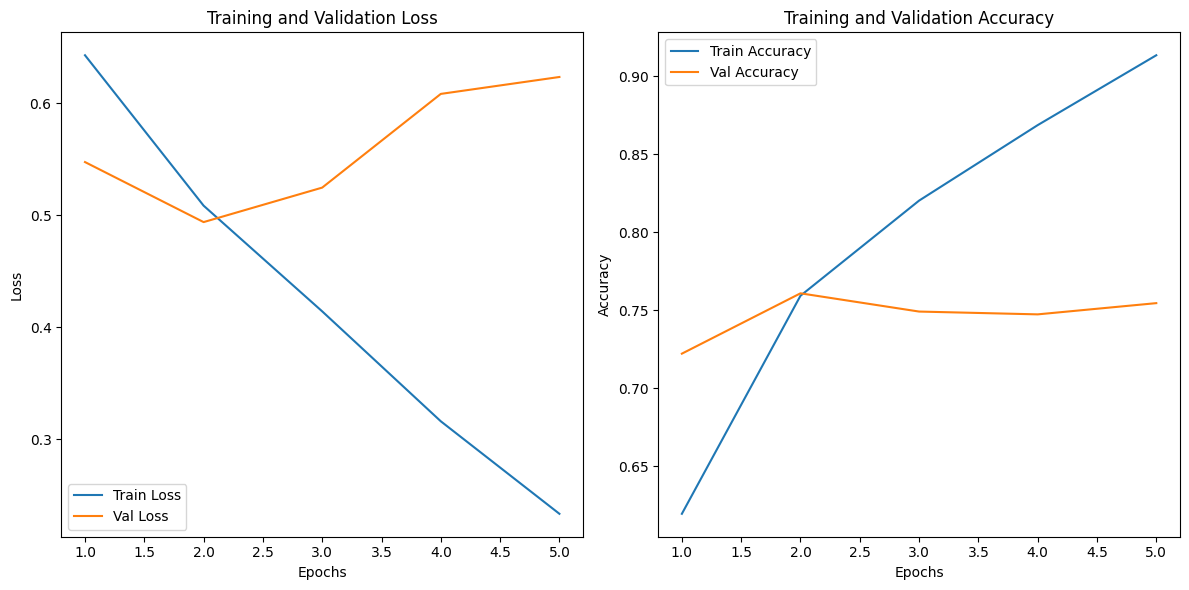

In [16]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 128
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3  # عدد epochs للانتظار قبل التوقف المبكر

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.6)
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()
    correct = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss

# ========== EARLY STOPPING ==========
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ========== MAIN FUNCTION ==========
def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    print(df[['text', 'caption', 'label']].isnull().sum())
    df = df.dropna(subset=['text', 'caption', 'label'])

    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=5e-3)
    loss_fn = nn.BCEWithLogitsLoss()

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        scheduler.step(val_loss)  # <-- هنا بنحدّث ال scheduler حسب خسارة التحقق

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

    # رسم الخسارة والدقة
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
Train Accuracy = 0.6638, Train Loss = 0.5971
Val Accuracy = 0.7248, Val Loss = 0.5251
Epoch 2/20
Train Accuracy = 0.7730, Train Loss = 0.4806
Val Accuracy = 0.7644, Val Loss = 0.5010
Epoch 3/20
Train Accuracy = 0.8171, Train Loss = 0.4102
Val Accuracy = 0.7248, Val Loss = 0.5801
EarlyStopping counter: 1 out of 3
Epoch 4/20
Train Accuracy = 0.8582, Train Loss = 0.3436
Val Accuracy = 0.7401, Val Loss = 0.5758
EarlyStopping counter: 2 out of 3
Epoch 5/20
Train Accuracy = 0.8967, Train Loss = 0.2610
Val Accuracy = 0.7419, Val Loss = 0.6214
EarlyStopping counter: 3 out of 3
Early stopping triggered. Stopping training.


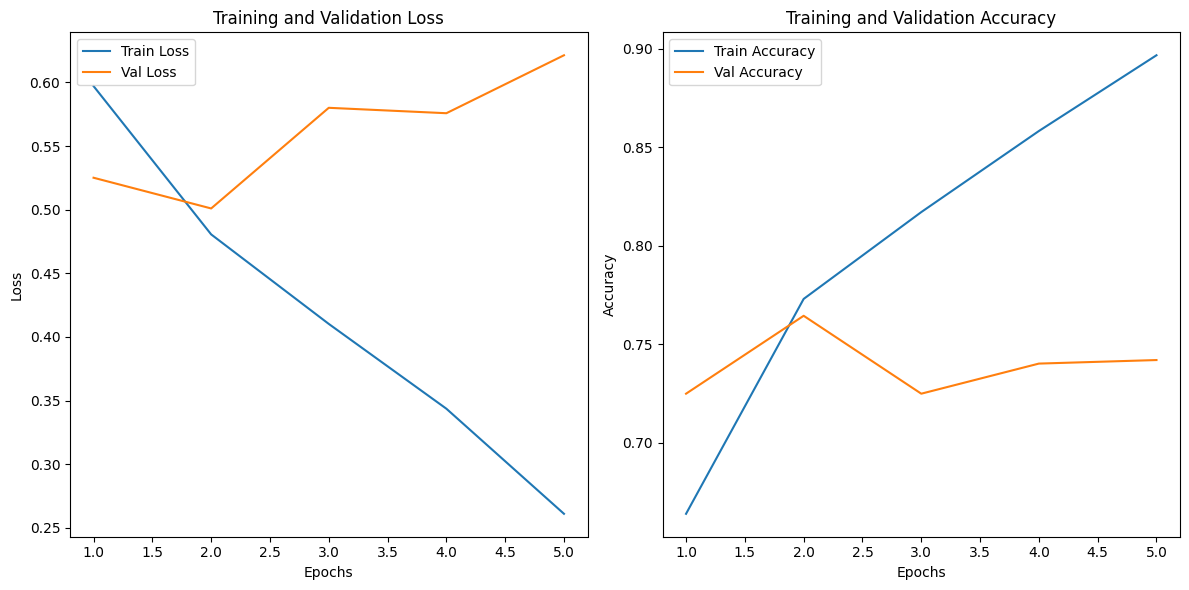

In [17]:
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

MAX_LEN = 128
BATCH_SIZE = 16
ROBERTA_MODEL = 'roberta-base'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3

class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

class EarlyFusionClassifier(nn.Module):
    def __init__(self, roberta_model):
        super(EarlyFusionClassifier, self).__init__()
        self.roberta = RobertaModel.from_pretrained(roberta_model)
        self.dropout = nn.Dropout(0.6)
        self.fc = nn.Linear(self.roberta.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        text_output = self.roberta(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.roberta(input_ids=caption_ids, attention_mask=caption_mask).pooler_output
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()
    correct = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss

class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    print(df[['text', 'caption', 'label']].isnull().sum())
    df = df.dropna(subset=['text', 'caption', 'label'])

    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    tokenizer = RobertaTokenizer.from_pretrained(ROBERTA_MODEL)

    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifier(ROBERTA_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=5e-3)
    loss_fn = nn.BCEWithLogitsLoss()

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        scheduler.step(val_loss)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== CONFIG ==========
MAX_LEN = 85
BATCH_SIZE = 16
BERT_MODEL = 'bert-base-uncased'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
PATIENCE = 3  # عدد epochs للانتظار قبل التوقف المبكر

# ========== DATASET ==========
class NewsDataset(Dataset):
    def __init__(self, texts, captions, labels, tokenizer, max_len):
        self.texts = texts
        self.captions = captions
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        caption = str(self.captions[item])
        label = int(self.labels[item])

        text_inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                     max_length=self.max_len, return_tensors="pt")
        caption_inputs = self.tokenizer(caption, padding='max_length', truncation=True,
                                        max_length=self.max_len, return_tensors="pt")

        return {
            'text_input_ids': text_inputs['input_ids'].squeeze(0),
            'text_attention_mask': text_inputs['attention_mask'].squeeze(0),
            'caption_input_ids': caption_inputs['input_ids'].squeeze(0),
            'caption_attention_mask': caption_inputs['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# ========== MODEL ==========
class EarlyFusionClassifier(nn.Module):
    def __init__(self, bert_model):
        super(EarlyFusionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(1)
        self.fc = nn.Linear(self.bert.config.hidden_size * 2, 1)

    def forward(self, text_ids, text_mask, caption_ids, caption_mask):
        text_output = self.bert(input_ids=text_ids, attention_mask=text_mask).pooler_output
        caption_output = self.bert(input_ids=caption_ids, attention_mask=caption_mask).pooler_output
        fused = torch.cat((text_output, caption_output), dim=1)
        fused = self.dropout(fused)
        out = self.fc(fused)
        return out

# ========== TRAINING UTILITIES ==========
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    losses = []
    correct = 0

    for batch in data_loader:
        text_ids = batch['text_input_ids'].to(DEVICE)
        text_mask = batch['text_attention_mask'].to(DEVICE)
        caption_ids = batch['caption_input_ids'].to(DEVICE)
        caption_mask = batch['caption_attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
        loss = loss_fn(outputs, labels.float())

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return correct / len(data_loader.dataset), sum(losses) / len(losses)

def evaluate(model, data_loader, loss_fn):
    model.eval()
    correct = 0
    losses = []

    with torch.no_grad():
        for batch in data_loader:
            text_ids = batch['text_input_ids'].to(DEVICE)
            text_mask = batch['text_attention_mask'].to(DEVICE)
            caption_ids = batch['caption_input_ids'].to(DEVICE)
            caption_mask = batch['caption_attention_mask'].to(DEVICE)
            labels = batch['label'].to(DEVICE)

            outputs = model(text_ids, text_mask, caption_ids, caption_mask).squeeze(-1)
            loss = loss_fn(outputs, labels.float())
            losses.append(loss.item())

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()

    accuracy = correct / len(data_loader.dataset)
    avg_loss = sum(losses) / len(losses)
    return accuracy, avg_loss

# ========== EARLY STOPPING ==========
class EarlyStopping:
    def __init__(self, patience=PATIENCE, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ========== MAIN FUNCTION ==========
def main(csv_path):
    df = pd.read_csv(csv_path)
    df = df.reset_index(drop=True)
    print(df[['text', 'caption', 'label']].isnull().sum())
    df = df.dropna(subset=['text', 'caption', 'label'])

    train_texts, val_texts, train_captions, val_captions, train_labels, val_labels = train_test_split(
        df['text'], df['caption'], df['label'], test_size=0.2, random_state=42)

    train_texts = train_texts.reset_index(drop=True)
    val_texts = val_texts.reset_index(drop=True)
    train_captions = train_captions.reset_index(drop=True)
    val_captions = val_captions.reset_index(drop=True)
    train_labels = train_labels.reset_index(drop=True)
    val_labels = val_labels.reset_index(drop=True)

    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

    train_dataset = NewsDataset(train_texts, train_captions, train_labels, tokenizer, MAX_LEN)
    val_dataset = NewsDataset(val_texts, val_captions, val_labels, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = EarlyFusionClassifier(BERT_MODEL).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=5e-3)
    loss_fn = nn.BCEWithLogitsLoss()

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch + 1}/{EPOCHS}")
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
        val_acc, val_loss = evaluate(model, val_loader, loss_fn)

        scheduler.step(val_loss)  # <-- هنا بنحدّث ال scheduler حسب خسارة التحقق

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Train Accuracy = {train_acc:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Val Accuracy = {val_acc:.4f}, Val Loss = {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

    # رسم الخسارة والدقة
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main("/content/drive/MyDrive/ANN/merged_dataset.csv")


text       0
caption    0
label      0
dtype: int64
Epoch 1/20
